In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from math import pi, fabs

from imageProcessing import getRed, getBlue, getEllipsesOfContours, getContours
from game import TargetType
from targetDetection import targetDetection, TargetContoursOlympicTarget, getDetectionMatrix, getBestEllipse
from statistics import mean
from hitPlacement import getBinDiff

get red and blue colors from an image

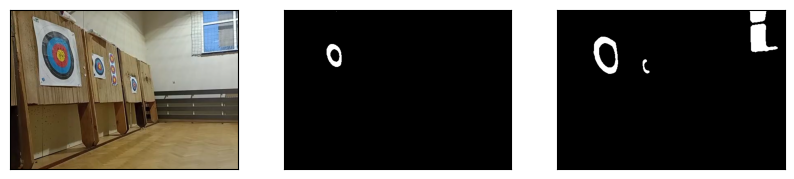

In [3]:
imTest1 = cv2.imread("testVideosAndImages/targetRaw2.png")
imTest2 = cv2.imread("dokuImages/target24.jpg")

imTest1 = cv2.cvtColor(imTest1, cv2.COLOR_BGR2RGB)
imTest2 = cv2.cvtColor(imTest2, cv2.COLOR_BGR2RGB)

imRed1 = getRed(imTest1)
imRed2 = getRed(imTest2)
imBlue1 = getBlue(imTest1)
imBlue2 = getBlue(imTest2)

"""fig, axs = plt.subplots(2,3)

axs[0,0].imshow(imTest1)
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
axs[0,1].imshow(imRed1, 'gray')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
axs[0,2].imshow(imBlue1, 'gray')
axs[0,2].set_xticks([])
axs[0,2].set_yticks([])

axs[1,0].imshow(imTest2)
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
axs[1,1].imshow(imRed2, 'gray')
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])
axs[1,2].imshow(imBlue2, 'gray')
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])"""

fig, axs = plt.subplots(1,3)

axs[0].imshow(imTest1)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].imshow(imRed1, 'gray')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[2].imshow(imBlue1, 'gray')
axs[2].set_xticks([])
axs[2].set_yticks([])

fig.set_figheight(5)
fig.set_figwidth(10)

In [115]:
cv2.imwrite('dokuImages/redTarget1.jpg', imRed1)
cv2.imwrite('dokuImages/redTarget2.jpg', imRed2)
cv2.imwrite('dokuImages/blueTarget1.jpg', imBlue1)
cv2.imwrite('dokuImages/blueTarget2.jpg', imBlue2)

True

In [17]:
Redge1, Bedge1 = getContours(imRed1, imBlue1)
Redge2, Bedge2 = getContours(imRed2, imBlue2)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (9,) + inhomogeneous part.

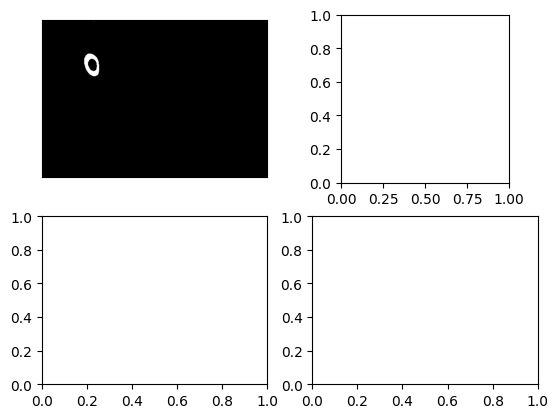

In [18]:
fig, axs = plt.subplots(2,2)

axs[0,0].imshow(imRed1,'gray')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
axs[0,1].imshow(Redge1, 'gray')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])

axs[1,0].imshow(imBlue2, 'gray')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
axs[1,1].imshow(Bedge2, 'gray')
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

fig.set_figheight(6)
fig.set_figwidth(6)

Get pair of ellipses

In [4]:
def getBestEllipse2(redEllipses, blueEllipses, detectionMatrix, axesPlacementMatrix, targetType: TargetType):
    # creates target from best pair

    # takes the gratest ellipses according to accuracy matrix
    r, b = np.unravel_index(np.argmax(detectionMatrix), detectionMatrix.shape)

    (yr, xr), (axmajorR, axminorR), angleR = redEllipses[r]
    (yb, xb), (axmajorB, axminorB), angleB = blueEllipses[b]
    return redEllipses[r], blueEllipses[b]

In [5]:
def getContours2(RedBoosted: np.ndarray, BlueBoosted: np.ndarray):
    # function gets contours of an image

    RedBlurred = RedBoosted.copy()
    BlueBlurred = BlueBoosted.copy()

    # multiple median blur
    for _ in range(np.max(RedBoosted.shape)//100):
        RedBlurred = cv2.medianBlur(RedBlurred, 5)
        BlueBlurred = cv2.medianBlur(BlueBlurred, 5)

    # edge detection
    RedEdges = cv2.Canny(RedBlurred,50,150)
    BlueEdges = cv2.Canny(BlueBlurred,50,150)

    return RedEdges, BlueEdges

In [6]:
image1 = cv2.imread('testVideosAndImages/targetRaw2.png')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

image2 = cv2.imread('dokuImages/target24.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

In [7]:
Redges1, Bedges1 = getContours2(getRed(image1), getBlue(image1))

Redges2, Bedges2 = getContours2(getRed(image2), getBlue(image2))

In [8]:
RedImage1 = getRed(image1.copy())
BlueImage1 = getBlue(image1.copy())
ContoursResult1 = getContours(RedImage1, BlueImage1)


RedContours1, BlueContours1 = ContoursResult1
AccuracyResult1 =  getEllipsesOfContours(image1, RedContours1, BlueContours1)

    
redEllipses1, blueEllipses1 = AccuracyResult1
detectionMatrix1, axesPlacementMatrix1 = getDetectionMatrix(redEllipses1, blueEllipses1, TargetType.REGULAR_1_10)
        
rell1, bell1 = getBestEllipse2(redEllipses1, blueEllipses1, detectionMatrix1, axesPlacementMatrix1, TargetType.REGULAR_1_10)






RedImage2 = getRed(image2.copy())
BlueImage2 = getBlue(image2.copy())
ContoursResult2 = getContours(RedImage2, BlueImage2)


RedContours2, BlueContours2 = ContoursResult2
AccuracyResult2 =  getEllipsesOfContours(image2, RedContours2, BlueContours2)

    
redEllipses2, blueEllipses2 = AccuracyResult2
detectionMatrix2, axesPlacementMatrix2 = getDetectionMatrix(redEllipses2, blueEllipses2, TargetType.REGULAR_1_10)
        
rell2, bell2 = getBestEllipse2(redEllipses2, blueEllipses2, detectionMatrix2, axesPlacementMatrix2, TargetType.REGULAR_1_10)

In [9]:
Redgescpy1 = Redges1.copy()
Redgescpy1 = cv2.cvtColor(Redgescpy1, cv2.COLOR_GRAY2RGB)

Bedgescpy1 = Bedges1.copy()
Bedgescpy1 = cv2.cvtColor(Bedgescpy1, cv2.COLOR_GRAY2RGB)




Redgescpy2 = Redges2.copy()
Redgescpy2 = cv2.cvtColor(Redgescpy2, cv2.COLOR_GRAY2RGB)

Bedgescpy2 = Bedges2.copy()
Bedgescpy2 = cv2.cvtColor(Bedgescpy2, cv2.COLOR_GRAY2RGB)

In [10]:
Redgescpy1 = cv2.ellipse(Redgescpy1, rell1, (0,255,0), 2)
Bedgescpy1 = cv2.ellipse(Bedgescpy1, bell1, (0,255,0), 2)

Redgescpy2 = cv2.ellipse(Redgescpy2, rell2, (0,255,0), 2)
Bedgescpy2 = cv2.ellipse(Bedgescpy2, bell2, (0,255,0), 2)

In [11]:
Bestell1 = getBestEllipse(redEllipses1, blueEllipses1, detectionMatrix1, axesPlacementMatrix1, TargetType.REGULAR_1_10)
Bestell2 = getBestEllipse(redEllipses2, blueEllipses2, detectionMatrix2, axesPlacementMatrix2, TargetType.REGULAR_1_10)

In [12]:
imcpy1 = image1.copy()
imcpy2 = image2.copy()

In [13]:
imcpy1 = cv2.ellipse(imcpy1, Bestell1, (0,255,0), 7)

imcpy2 = cv2.ellipse(imcpy2, Bestell2, (0,255,0), 7)

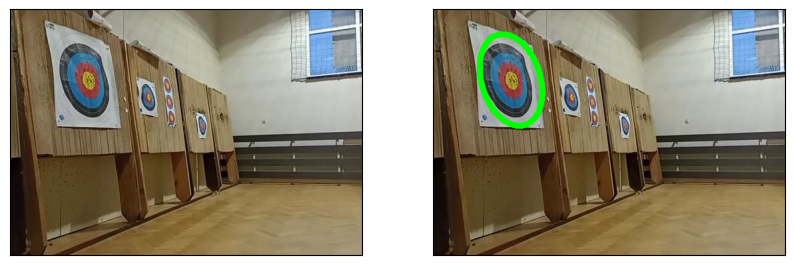

In [14]:
"""fig, axs = plt.subplots(2,2)

axs[0,0].imshow(image1)
axs[0,0].set_yticks([])
axs[0,0].set_xticks([])
axs[0,1].imshow(imcpy1)
axs[0,1].set_yticks([])
axs[0,1].set_xticks([])

axs[1,0].imshow(image2)
axs[1,0].set_yticks([])
axs[1,0].set_xticks([])
axs[1,1].imshow(imcpy2)
axs[1,1].set_yticks([])
axs[1,1].set_xticks([])"""

fig, axs = plt.subplots(1,2)

axs[0].imshow(image1)
axs[0].set_yticks([])
axs[0].set_xticks([])
axs[1].imshow(imcpy1)
axs[1].set_yticks([])
axs[1].set_xticks([])

fig.set_figwidth(10)
fig.set_figheight(5)

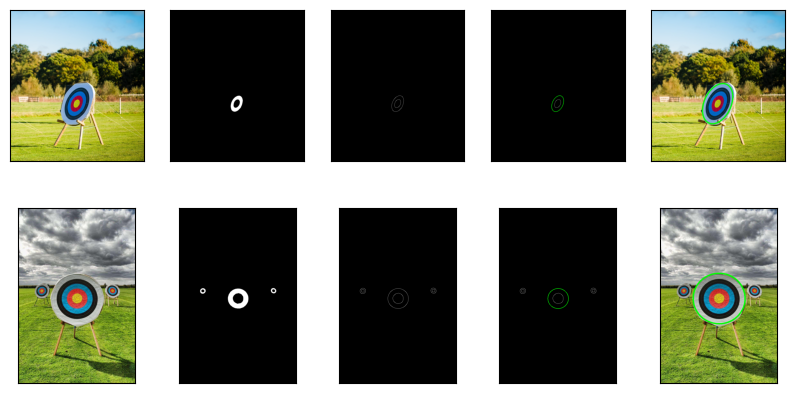

In [72]:
fig, axs = plt.subplots(2,5)

axs[0,0].imshow(image1)
axs[0,0].set_yticks([])
axs[0,0].set_xticks([])
axs[0,1].imshow(getRed(image1), 'gray')
axs[0,1].set_yticks([])
axs[0,1].set_xticks([])
axs[0,2].imshow(Redges1, 'gray')
axs[0,2].set_yticks([])
axs[0,2].set_xticks([])
axs[0,3].imshow(Redgescpy1)
axs[0,3].set_yticks([])
axs[0,3].set_xticks([])
axs[0,4].imshow(imcpy1)
axs[0,4].set_yticks([])
axs[0,4].set_xticks([])

axs[1,0].imshow(image2)
axs[1,0].set_yticks([])
axs[1,0].set_xticks([])
axs[1,1].imshow(getRed(image2), 'gray')
axs[1,1].set_yticks([])
axs[1,1].set_xticks([])
axs[1,2].imshow(Redges2, 'gray')
axs[1,2].set_yticks([])
axs[1,2].set_xticks([])
axs[1,3].imshow(Redgescpy2)
axs[1,3].set_yticks([])
axs[1,3].set_xticks([])
axs[1,4].imshow(imcpy2)
axs[1,4].set_yticks([])
axs[1,4].set_xticks([])

fig.set_figheight(5)
fig.set_figwidth(10)

In [12]:
(y,x), (axmajor, axminor), angle = Bestell1

In [13]:
rotationMatrix = cv2.getRotationMatrix2D(np.array([y,x]), angle, 1.0)
rotatedImage = cv2.warpAffine(image1, rotationMatrix, (image1.shape[1], image1.shape[0]))

k = max(axminor, axmajor)/min(axminor, axmajor)
scalingMatrix = np.array([[k, 0, (1-k)*x], [0, 1, 0]])
scaledImage = cv2.warpAffine(rotatedImage, scalingMatrix, (image1.shape[1], image1.shape[0]))

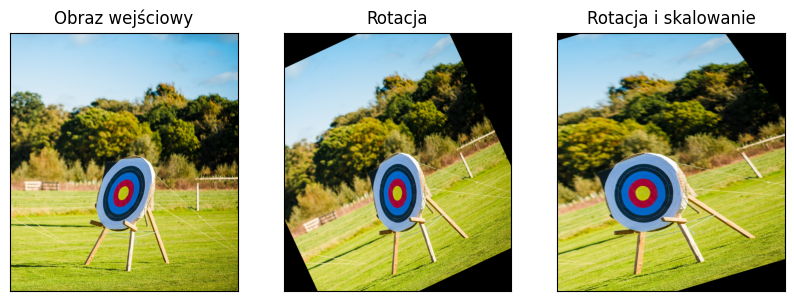

In [23]:
fig, axs = plt.subplots(1,3)

axs[0].imshow(image1)
axs[1].imshow(rotatedImage)
axs[2].imshow(scaledImage)

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

axs[0].set_title("Obraz wejściowy")
axs[1].set_title("Rotacja")
axs[2].set_title("Rotacja i skalowanie")

fig.set_figheight(7)
fig.set_figwidth(10)

In [28]:
arrow1 = cv2.imread("testVideosAndImages/arrow1.jpg")
arrow1 = cv2.cvtColor(arrow1, cv2.COLOR_BGR2RGB)
parrow1 = cv2.imread("testVideosAndImages/parrow1.jpg")
parrow1 = cv2.cvtColor(parrow1, cv2.COLOR_BGR2RGB)
diff1 = cv2.imread("testVideosAndImages/diff1.jpg")

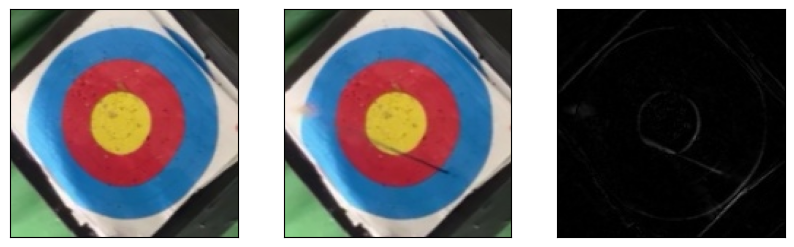

In [35]:
fig, axs = plt.subplots(1,3)
axs[0].imshow(parrow1)
axs[1].imshow(arrow1)
axs[2].imshow(diff1)

for ax in axs:
    ax.set_yticks([])
    ax.set_xticks([])

fig.set_figwidth(10)
fig.set_figheight(10)

In [3]:
image = cv2.imread('testVideosAndImages/parrow1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

imGray = cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY)

In [4]:
ell = (0,0),(111,130),128

In [5]:
imcpy = image.copy()
(_,_), (_, _), angle = ell
imcpy = cv2.medianBlur(imcpy, ksize=5)
imcpy = cv2.Canny(imcpy, 50,150)
thr = (image.shape[0]+image.shape[1])/8
lines = cv2.HoughLines(imcpy, rho=1, theta=pi/180, threshold=int(thr+0.5))
imline = np.ones(imcpy.shape)

rang = (image.shape[0]+image.shape[1])/2

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        if fabs(angle-(180*theta/pi)%180) < 20:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + rang * (-b))
            y1 = int(y0 + rang * (a))
            x2 = int(x0 - rang * (-b))
            y2 = int(y0 - rang * (a))

            imline = cv2.line(imline.copy(), (x1, y1), (x2, y2), 0, 1)

imdilate = cv2.erode(imline, np.ones((7,7)))

In [6]:
diffIm = cv2.imread("testVideosAndImages/diff1.jpg", cv2.IMREAD_GRAYSCALE)

In [7]:
diff = np.multiply(diffIm, imdilate)

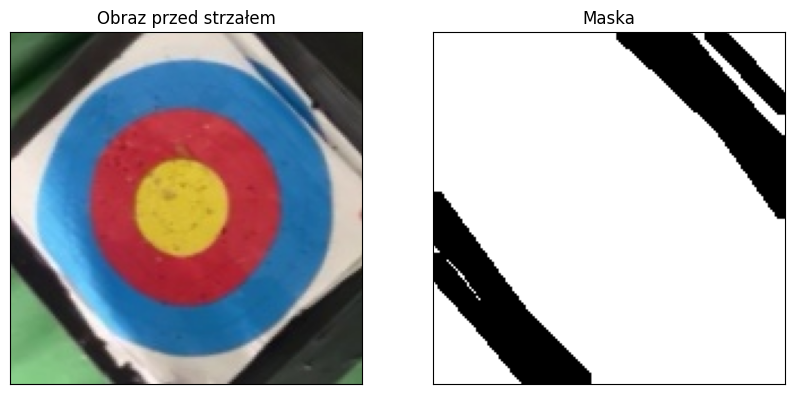

In [10]:
fig, axs = plt.subplots(1,2)

axs[0].imshow(image)
axs[1].imshow(imdilate, 'gray')
#axs[0].imshow(diffIm, 'gray')
#axs[1].imshow(diff, 'gray')
#axs[2].imshow(getBinDiff(diff, imdilate), 'gray')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

axs[0].set_title("Obraz przed strzałem")
axs[1].set_title("Maska")
#axs[2].set_title("Progowanie obrazu")
#axs[3].set_title("Progowanie")

fig.set_figheight(10)
fig.set_figwidth(10)

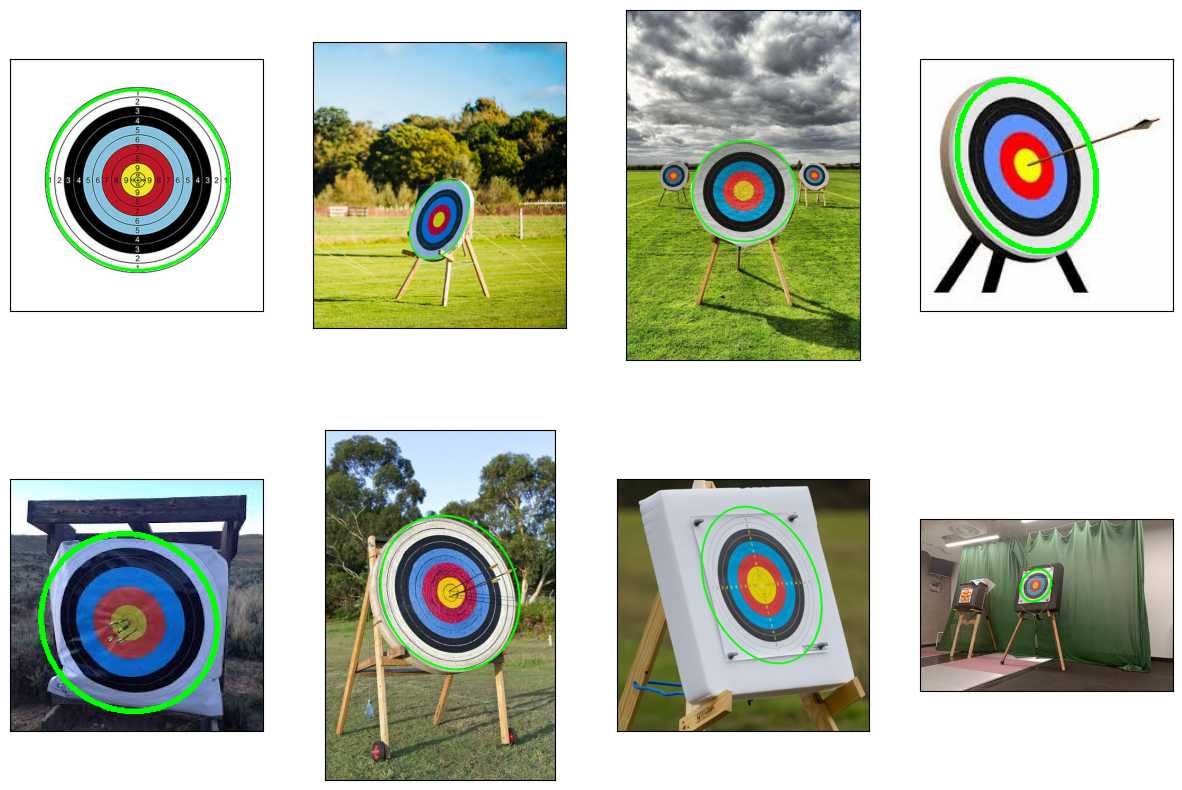

In [39]:
im1 = cv2.imread('dokuImages/target1.jpg')
im2 = cv2.imread('dokuImages/target20.jpg')
im3 = cv2.imread('dokuImages/target24.jpg')
im4 = cv2.imread('dokuImages/target8.jpg')
im5 = cv2.imread('dokuImages/target11.jpg')
im6 = cv2.imread('dokuImages/target26.jpg')
im7 = cv2.imread('dokuImages/target15.jpg')
im8 = cv2.imread('testVideosAndImages/targetRaw1.png')



im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)
im5 = cv2.cvtColor(im5, cv2.COLOR_BGR2RGB)
im6 = cv2.cvtColor(im6, cv2.COLOR_BGR2RGB)
im7 = cv2.cvtColor(im7, cv2.COLOR_BGR2RGB)
im8 = cv2.cvtColor(im8, cv2.COLOR_BGR2RGB)



ell1 = targetDetection(im1, TargetType.REGULAR_1_10)
ell2 = targetDetection(im2, TargetType.REGULAR_1_10)
ell3 = targetDetection(im3, TargetType.REGULAR_1_10)
ell4 = targetDetection(im4, TargetType.REGULAR_1_10)
ell5 = targetDetection(im5, TargetType.REGULAR_1_10)
ell6 = targetDetection(im6, TargetType.REGULAR_1_10)
ell7 = targetDetection(im7, TargetType.REGULAR_1_10)
ell8 = targetDetection(im8, TargetType.REGULAR_1_10)



im1 = cv2.ellipse(im1, ell1, (0,255,0), 4)
im2 = cv2.ellipse(im2, ell2, (0,255,0), 4)
im3 = cv2.ellipse(im3, ell3, (0,255,0), 4)
im4 = cv2.ellipse(im4, ell4, (0,255,0), 4)
im5 = cv2.ellipse(im5, ell5, (0,255,0), 4)
im6 = cv2.ellipse(im6, ell6, (0,255,0), 4)
im7 = cv2.ellipse(im7, ell7, (0,255,0), 4)
im8 = cv2.ellipse(im8, ell8, (0,255,0), 4)



fig, axs = plt.subplots(2,4)

axs[0,0].imshow(im1)
axs[0,1].imshow(im2)
axs[0,2].imshow(im3)
axs[0,3].imshow(im4)

axs[1,0].imshow(im5)
axs[1,1].imshow(im6)
axs[1,2].imshow(im7)
axs[1,3].imshow(im8)

for ax in axs:
    for a in ax:
        a.set_yticks([])
        a.set_xticks([])

fig.set_figwidth(15)
fig.set_figheight(10)